In [1]:
import sys
# sys.path.append("/p300/liyuwei/MRI_Bonenet/MedicalZooPytorch")
sys.path.append("../")
import numpy as np
import torch
import matplotlib.pyplot as plt
from lib.medloaders.mrihand import MRIHandDataset

In [2]:
from examples.train_mribone import get_arguments

In [3]:
path = '/p300/liyuwei/DATA_mri/Hand_MRI_capture/seg_final'
total_data = 90
split_pkl = os.path.join(path, "splits_final.pkl")
split = np.load(split_pkl, allow_pickle=True)[0]
train_lst = split['train'][:2]
val_lst = split['val'][:2]


In [4]:
from lib.medloaders.medical_image_process import load_medical_image_hand

In [5]:
class tmp():
    def __init__(self):
        self.threshold = 0.1
        self.normalization = True
        self.augmentation = True


In [6]:
args = tmp()
train_loader = MRIHandDataset(args, 'train', dataset_path=path, crop_dim=(1, 1, 1),
                                lst=train_lst, samples=2, load=True)
val_loader = MRIHandDataset(args, 'val', dataset_path=path, crop_dim=(1, 1, 1), 
                                lst=val_lst, samples=2, load=True)

train Dataset samples : 2
CAP_SIMPLE_0
CJY_SIMPLE_0
val Dataset samples : 2
CJY_SIMPLE_5
FDL_SIMPLE_0


(300, 445, 146)
(300, 445, 146)
[[  0.57957454 -54.11190414]
 [  0.31824484 -49.45045853]
 [ -0.55929741  76.76956177]]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]


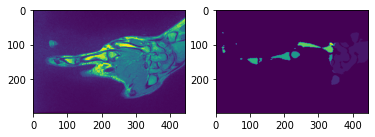

(321, 428, 122)
(321, 428, 122)
[[  0.5        -76.35951233]
 [  0.5        -80.32804108]
 [ -0.5        113.72342682]]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]


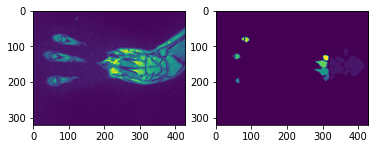

IndexError: list index out of range

In [9]:
for i in range(10):
    index = i
    item = train_loader.data_dict[index]
    t1 = np.load(item['input'])
    s = np.load(item['target_mask'])
    joint = item['joint']
    affine = item["affine"]

    print(t1.shape)
    print(s.shape)

    print(affine)

    print(np.unique(s))

    middle_slice = t1[:, :, 80]
    middle_slice_t = s[:, :, 80]

    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(middle_slice)
    plt.subplot(1,2,2)
    plt.imshow(middle_slice_t)
    plt.show()



In [11]:
np.eye(3) @ np.eye(3)


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

torch.Size([1, 256, 256, 256])
torch.Size([20, 256, 256, 256])
tensor([0., 1.])


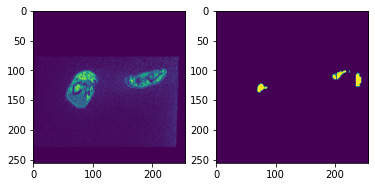

torch.Size([1, 256, 256, 256])
torch.Size([20, 256, 256, 256])
tensor([0., 1.])


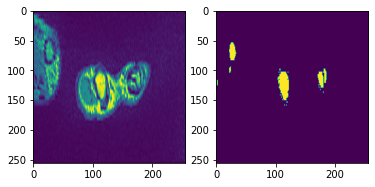

IndexError: list index out of range

In [11]:
import matplotlib.pyplot as plt
# for i in range(len(train_loader)):
for i in range(10):
    input, target = train_loader.__getitem__(i)
    print(input.shape)
    print(target.shape)

    print(torch.unique(torch.sum(target, dim=0)))

    middle_slice = input[0, 80, :, :]
    middle_slice_t = torch.sum(target[:, 80, :, :], dim=0)

    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(middle_slice)
    plt.subplot(1,2,2)
    plt.imshow(middle_slice_t)
    plt.show()


torch.Size([1, 256, 256, 256])
torch.Size([20, 256, 256, 256])


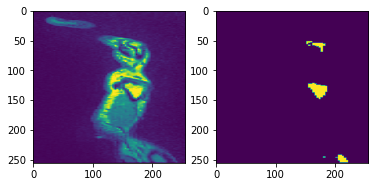

torch.Size([1, 256, 256, 256])
torch.Size([20, 256, 256, 256])


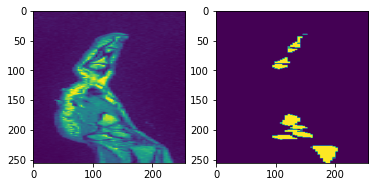

IndexError: list index out of range

In [8]:
import matplotlib.pyplot as plt
for i in range(5):
    input, target = val_loader.__getitem__(i)
    print(input.shape)
    print(target.shape)

    
    middle_slice = input[0, 80, :, :]
    middle_slice_t = torch.sum(target[:, 80, :, :], dim=0)

    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(middle_slice)
    plt.subplot(1,2,2)
    plt.imshow(middle_slice_t)
    plt.show()